In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [2]:
# transform samples in dataframe with pandas
file = "../Data/BruteData/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/flowRun.dat"
data_used = {"time": [], "pVol": [], "FFlowL": [], "FFlowN": [] ,"pG(dyne/mm2)":[], "pC(dyne/mm2)":[]}
with open(file, 'r') as file:
    for line in file:
        # Skip empty lines or header lines if needed
        if line.strip():
            # Split the line by any whitespace
            parts = line.split()

            # Check if the line has the correct number of columns
            if len(parts) == 7:  # There should be 7 columns per your data
                # Extract values from specific columns
                time_value = float(parts[1])  # Time(s) is the second column
                pVol_value = float(parts[2])  # pVol is the third column
                FFlowL_value = float(parts[3])  # FFlowL is the fourth column
                FFlowN_value = float(parts[4])  # FFlowN is the fifth column
                pG_value = float(parts[5])  # pG is the sixth column
                pC_value = float(parts[6])  # FFlowL is the seventh column

                # Append values to the corresponding lists in the dictionary
                data_used["time"].append(time_value)
                data_used["pVol"].append(pVol_value)
                data_used["FFlowL"].append(FFlowL_value)
                data_used["FFlowN"].append(FFlowN_value)
                data_used["pG(dyne/mm2)"].append(pG_value)
                data_used["pC(dyne/mm2)"].append(pC_value)

# convert dictonary to dataframe structure
df = pd.DataFrame(data=data_used)
df.head()

,time,pVol,FFlowL,FFlowN,pG(dyne/mm2),pC(dyne/mm2)
0,2.133460,0.500030,0.530391,0.532069,7216.216,676.7774
1,4.267250,1.000137,0.533249,0.535034,7221.846,682.4081
2,6.400145,1.500034,0.534200,0.536069,7222.835,683.3969
3,8.533729,2.000093,0.534206,0.536199,7224.447,685.0091
4,10.666930,2.500062,0.534356,0.536305,7225.148,685.7096


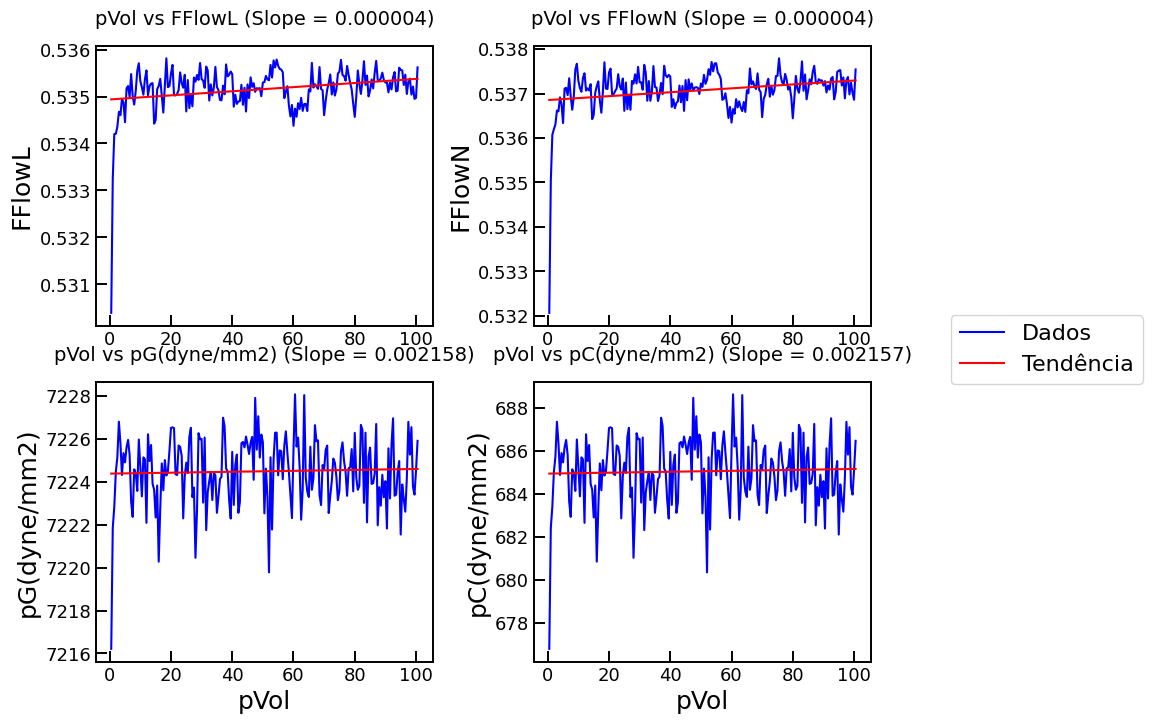

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Defina as colunas e os rótulos que você deseja plotar
columns = ['FFlowL', 'FFlowN', 'pG(dyne/mm2)', 'pC(dyne/mm2)']
titles = ['pVol vs FFlowL', 'pVol vs FFlowN', 'pVol vs pG(dyne/mm2)', 'pVol vs pC(dyne/mm2)']
y_labels = ['FFlowL', 'FFlowN', 'pG(dyne/mm2)', 'pC(dyne/mm2)']

# Pule as três primeiras linhas do dataframe
df_trimmed = df.iloc[0:]

# Crie uma grade de subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'wspace': 0.3})
thickness_axes = 1.4

# Itere sobre os subplots e faça os gráficos com regressão linear
for ax, col, title, y_label in zip(axs.flat, columns, titles, y_labels):
    # Dados do eixo x (pVol) e eixo y (coluna específica)
    x = df_trimmed['pVol']
    y = df_trimmed[col]

    # Plotar os dados como uma linha contínua
    ax.plot(x, y, '-', label='Dados', color='blue')

    # Calcular a regressão linear
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calcular os valores da linha de regressão
    reg_line = slope * x + intercept

    # Plotar a linha de regressão
    ax.plot(x, reg_line, color='red', label='Tendência')

    # Ajustar título com o coeficiente de linearidade (slope) e definir pad
    ax.set_title(f"{title} (Slope = {slope:.6f})", fontsize=14, pad=15)
    
    # Condição para exibir o rótulo do eixo x apenas nos subplots (1,0) e (1,1)
    if ax in [axs[1, 0], axs[1, 1]]:
        ax.set_xlabel('pVol', fontsize=18)
        
    # Exibir o rótulo do eixo y em todos os subplots
    ax.set_ylabel(y_label, fontsize=18)

    # Ajustes estéticos
    ax.tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Adicionar uma legenda comum ao lado direito dos subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(.98, 0.5), borderaxespad=0, prop={"size":16})

# Salvar o gráfico com bbox_inches='tight' para ajustar a posição da legenda corretamente
plt.savefig("../presentation/stationary_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4711.pdf", dpi=300, bbox_inches='tight')
plt.show()
